<a href="https://colab.research.google.com/github/nikorose87/MoM-resources/blob/main/Exam_2nd_term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Second term Exam Mechanics of Materials

Let us first load the alumni of this course:

In [64]:
import pandas as pd 
import numpy as np

classlist1 = pd.read_excel("https://www.dropbox.com/s/9khod9m3orvc8jl/MoM%202021%20II%20Asistencia.xlsx?dl=1")
classlist1

,ID,Nombre
0,30000057972,"DÍAZ PÉREZ,DAVID STEVEN"
1,30000025188,"Florez Huerfano,Brandon"
2,30000048970,"GARCIA RODRIGUEZ,ANDRES FELIPE"
3,30000057750,"GRACIA GUERRA,DANIEL FELIPE"
4,30000050481,"IGLESIAS GARCIA,ANDRES FELIPE"
5,30000057155,"JARAMILLO GUTIERREZ,FABIAN ALEJANDRO"
6,30000048121,"PARRA MADRIGAL,JUAN GILBERTO"
7,30000043745,"PORTILLA HURTADO,JUAN PABLO"
8,30000057974,"PÉREZ CASTRILLÓN,NICOLÁS"
9,30000049983,"ROMERO REY,CRISTIAN ALEXANDER"


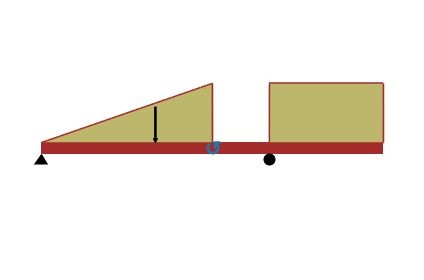

In [65]:
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols
R1, R2 = symbols('R1, R2')
E, I = symbols('E, I')
b = Beam(6, E, I)
b.apply_support(0, "pin")
b.apply_support(4, "roller")
b.apply_load(10, 2, -1)
b.apply_load(20, 3, -2)
b.apply_load(9, 4, 0, 6)
b.apply_load(5, 0, 1, 3)
p = b.draw()
p.show()

## Bending Design Exercise

Consider the previous diagram. There is a triangular proportional load at the beginning with a magnitude of $F_t$ kN of $L_t$ distance from the beginning of the beam. Later an specific load $F_p$ is applied at $L_{F_p}$ from the left. A pure moment $M$ is applied at $L_M$ from the left. Finally, a rectangular distributed load is applied from $L_{R_0}$ up to the end of the beam with a magnitude $F_R$. Consider the total distance of the beam as 6 m. There are two support reactions, one pinned at the beginning and the other, located at $4m$.

The objective is to select the most economical wide-flange section (meaning economical as the lighter), thus do the following:



1.   Draw the Shear and bending moment diagrams.
2.   Obtain the $S$ modulus according to the allowed normal stress $\sigma_{all}=160MPa$.
3. Select at least 4 options that satisfy the requirements of design. 
4. Propose the best option from the table of the book.

Consider the following values expressed in meters ($m$), kN.m for torque, kN and $\frac{kN}{m}$ for forces.



In [68]:
not_lock = False
list_ben = classlist1.copy()
if not_lock:
    list_ben['$F_t$'] = np.random.choice(np.arange(6,12,1), 16) #kN/m
    list_ben['Lt'] = np.random.choice(np.arange(1,4,1), 16) #m
    list_ben['Fp'] = np.random.choice(np.arange(6,12,10), 16) #kN
    list_ben['LFp'] = np.random.choice(np.arange(2,6,1), 16) #m
    list_ben['M'] = np.random.choice(np.arange(40,80,10), 16) #kN
    list_ben['L_M'] = np.random.choice(np.arange(1,5,1), 16) #m
    list_ben['Fr'] = np.random.choice(np.arange(6,12,10), 16) #kN
    list_ben['L_Fr0'] = np.random.choice(np.arange(3,5,1), 16) #m
    list_ben.to_csv("List_ben.csv")
else:
    list_ben = pd.read_csv("List_ben.csv", index_col=0)
list_ben

,ID,Nombre,$F_t$,Lt,Fp,LFp,M,L_M,Fr,L_Fr0
0,30000057972,"DÍAZ PÉREZ,DAVID STEVEN",11,2,6,3,60,1,6,4
1,30000025188,"Florez Huerfano,Brandon",6,3,6,5,60,4,6,3
2,30000048970,"GARCIA RODRIGUEZ,ANDRES FELIPE",8,3,6,4,70,3,6,3
3,30000057750,"GRACIA GUERRA,DANIEL FELIPE",10,3,6,2,70,1,6,4
4,30000050481,"IGLESIAS GARCIA,ANDRES FELIPE",6,2,6,5,40,2,6,3
5,30000057155,"JARAMILLO GUTIERREZ,FABIAN ALEJANDRO",11,1,6,3,70,4,6,4
6,30000048121,"PARRA MADRIGAL,JUAN GILBERTO",10,3,6,2,40,3,6,3
7,30000043745,"PORTILLA HURTADO,JUAN PABLO",8,1,6,4,50,4,6,4
8,30000057974,"PÉREZ CASTRILLÓN,NICOLÁS",6,2,6,2,70,1,6,4
9,30000049983,"ROMERO REY,CRISTIAN ALEXANDER",7,3,6,2,40,3,6,3


## Torsion problem

Shaft AB consists of $n$ homogeneous cylindrical elements, which can be solid or hollow. Its end A is fixed, while its end B is free, and it is subjected to the loading shown. The length of element i is denoted by $L_i$, its outer diameter by $OD_i$, its inner diameter by $ID_i$, its modulus of rigidity by $G_i$ and must be look in the material properties tables from the book, and the torque applied to its right end by $T_i$, the magnitude $T_i$ of this torque being assumed to be positive if Ti is counterclockwise from end B and negative other- wise. (Note that $ID_i = 0$ if the element is solid.) Obtain: 


1.   The  angle of twist of each element
2.   maximum shearing stress in each element
3.   The angle of twist from its base to this end.

![ima1](https://www.dropbox.com/s/n5pay0zge69uztc/torsion_exam_ex.png?dl=1)

In [69]:
not_lock = False
list_tor = classlist1.copy()
if not_lock:
    max_elem= 4
    num_elements = np.random.choice(np.arange(3,max_elem), 16)
    for i in range(max_elem-1):
        list_tor['L_{}'.format(i)] = np.nan #m
        list_tor['OD_{}'.format(i)] = np.nan # mm
        list_tor['ID_{}'.format(i)] = np.nan # mm
        list_tor['T_{}'.format(i)] = np.nan # Nm
        list_tor['Mat_{}'.format(i)] = np.nan 
    for k,i in enumerate(num_elements):
        for j in range(i):
          list_tor.loc[k,'L_{}'.format(j)] = np.random.choice(np.arange(100,400, 50))  #m
          list_tor.loc[k,'OD_{}'.format(j)] = np.random.choice(np.arange(60,120, 10))# mm
          list_tor.loc[k,'ID_{}'.format(j)] = np.random.choice(np.arange(0, 50, 10)) # mm
          list_tor.loc[k,'T_{}'.format(j)] = np.random.choice(np.arange(800, 1600, 200)) # Nm
          list_tor.loc[k,'Mat_{}'.format(j)] = np.random.choice(['Aluminum', 'Steel 308', 'Brass'])
    list_tor.to_csv("List_tor.csv")
else:
    list_tor = pd.read_csv("List_tor.csv", index_col=0)
list_tor

,ID,Nombre,L_0,OD_0,ID_0,T_0,Mat_0,L_1,OD_1,ID_1,T_1,Mat_1,L_2,OD_2,ID_2,T_2,Mat_2
0,30000057972,"DÍAZ PÉREZ,DAVID STEVEN",350.0,110.0,10.0,1400.0,Steel 308,150.0,100.0,20.0,800.0,Aluminum,350.0,90.0,30.0,1200.0,Steel 308
1,30000025188,"Florez Huerfano,Brandon",100.0,60.0,0.0,1000.0,Steel 308,150.0,70.0,30.0,1200.0,Aluminum,200.0,90.0,40.0,1000.0,Aluminum
2,30000048970,"GARCIA RODRIGUEZ,ANDRES FELIPE",250.0,90.0,40.0,1400.0,Brass,150.0,90.0,0.0,800.0,Aluminum,300.0,110.0,10.0,1400.0,Steel 308
3,30000057750,"GRACIA GUERRA,DANIEL FELIPE",300.0,60.0,20.0,800.0,Aluminum,100.0,80.0,0.0,1400.0,Aluminum,200.0,80.0,0.0,1400.0,Aluminum
4,30000050481,"IGLESIAS GARCIA,ANDRES FELIPE",100.0,60.0,20.0,1000.0,Aluminum,150.0,70.0,20.0,800.0,Aluminum,250.0,70.0,10.0,1200.0,Aluminum
5,30000057155,"JARAMILLO GUTIERREZ,FABIAN ALEJANDRO",350.0,60.0,40.0,800.0,Steel 308,200.0,110.0,0.0,1200.0,Brass,150.0,90.0,20.0,800.0,Aluminum
6,30000048121,"PARRA MADRIGAL,JUAN GILBERTO",100.0,80.0,30.0,1000.0,Aluminum,150.0,100.0,20.0,1000.0,Aluminum,350.0,110.0,0.0,1000.0,Brass
7,30000043745,"PORTILLA HURTADO,JUAN PABLO",150.0,110.0,10.0,1400.0,Aluminum,200.0,110.0,0.0,1400.0,Steel 308,150.0,110.0,20.0,800.0,Steel 308
8,30000057974,"PÉREZ CASTRILLÓN,NICOLÁS",150.0,100.0,40.0,1200.0,Brass,100.0,80.0,0.0,1000.0,Aluminum,300.0,80.0,0.0,1400.0,Aluminum
9,30000049983,"ROMERO REY,CRISTIAN ALEXANDER",300.0,110.0,0.0,1400.0,Brass,250.0,60.0,10.0,1200.0,Brass,350.0,80.0,10.0,1400.0,Aluminum
